In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import seaborn as sns

# Load the CSV (load date data as proper date types)
covid = "~/desktop/clinical-trial_data.csv"

# Use Pandas to read data
covid_df = pd.read_csv(covid)
covid_df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Start Date,Trial Duration,Primary Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,...,22-Jan-21,1-Jun-20,235,22-Jan-21,11-Jun-20,NaN,18-Feb-21,"Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,Vicore Pharma AB|Orphan Reach,...,13-Oct-20,21-Jul-20,84,13-Oct-20,30-Jun-20,30-Apr-21,30-Apr-21,"Department of Medicine, Civil Hospital and B J...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04452435
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,Fundacion SEIMC-GESIDA|Roche Pharma AG|Dynamic...,...,23-Dec-20,22-May-20,215,23-Dec-20,24-Jun-20,NaN,3-Feb-21,"Hospital Universitario de CabueÃ±es, GijÃ³n, A...",NaN,https://ClinicalTrials.gov/show/NCT04445272
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,Universidade Nova de Lisboa|NOVA Medical Schoo...,...,16-Jul-20,20-Apr-20,87,1-Jul-20,21-Apr-20,NaN,25-Aug-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",NaN,https://ClinicalTrials.gov/show/NCT04355741
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,Liaquat University of Medical & Health Sciences,...,15-Apr-21,29-Sep-20,198,28-Mar-21,8-Oct-20,NaN,22-Apr-21,"Liaquat University Hospital, JÄmshoro, Sindh,...",NaN,https://ClinicalTrials.gov/show/NCT04578158


In [2]:
# Clean Rows with Missing Data
covid_df.count()
cleaned_data_df = covid_df.dropna(how='any')
cleaned_data_df.count()
covid_df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Start Date,Trial Duration,Primary Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,...,22-Jan-21,1-Jun-20,235,22-Jan-21,11-Jun-20,NaN,18-Feb-21,"Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,Vicore Pharma AB|Orphan Reach,...,13-Oct-20,21-Jul-20,84,13-Oct-20,30-Jun-20,30-Apr-21,30-Apr-21,"Department of Medicine, Civil Hospital and B J...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04452435
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,Fundacion SEIMC-GESIDA|Roche Pharma AG|Dynamic...,...,23-Dec-20,22-May-20,215,23-Dec-20,24-Jun-20,NaN,3-Feb-21,"Hospital Universitario de CabueÃ±es, GijÃ³n, A...",NaN,https://ClinicalTrials.gov/show/NCT04445272
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,Universidade Nova de Lisboa|NOVA Medical Schoo...,...,16-Jul-20,20-Apr-20,87,1-Jul-20,21-Apr-20,NaN,25-Aug-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",NaN,https://ClinicalTrials.gov/show/NCT04355741
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,Liaquat University of Medical & Health Sciences,...,15-Apr-21,29-Sep-20,198,28-Mar-21,8-Oct-20,NaN,22-Apr-21,"Liaquat University Hospital, JÄmshoro, Sindh,...",NaN,https://ClinicalTrials.gov/show/NCT04578158


In [3]:
# Calculate Total Number of Trials 
total_trials = len(covid_df['NCT Number'].value_counts())
total_trials

1117

In [4]:
#Calculate Total Number of Days
total_days = len(covid_df['Trial Duration'].value_counts())
total_days 

326

In [5]:
# Converting the trial days into weeks and then adding a column to the DataFrame
weeks = covid_df["Trial Duration"]/7
covid_df["Trial Duration (Weeks)"] = weeks

covid_df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Trial Duration,Primary Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Trial Duration (Weeks)
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,...,1-Jun-20,235,22-Jan-21,11-Jun-20,NaN,18-Feb-21,"Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538,33.571429
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,Vicore Pharma AB|Orphan Reach,...,21-Jul-20,84,13-Oct-20,30-Jun-20,30-Apr-21,30-Apr-21,"Department of Medicine, Civil Hospital and B J...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04452435,12.000000
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,Fundacion SEIMC-GESIDA|Roche Pharma AG|Dynamic...,...,22-May-20,215,23-Dec-20,24-Jun-20,NaN,3-Feb-21,"Hospital Universitario de CabueÃ±es, GijÃ³n, A...",NaN,https://ClinicalTrials.gov/show/NCT04445272,30.714286
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,Universidade Nova de Lisboa|NOVA Medical Schoo...,...,20-Apr-20,87,1-Jul-20,21-Apr-20,NaN,25-Aug-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",NaN,https://ClinicalTrials.gov/show/NCT04355741,12.428571
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,Liaquat University of Medical & Health Sciences,...,29-Sep-20,198,28-Mar-21,8-Oct-20,NaN,22-Apr-21,"Liaquat University Hospital, JÄmshoro, Sindh,...",NaN,https://ClinicalTrials.gov/show/NCT04578158,28.285714


In [6]:
# Remove Several Columns
remove_columns = covid_df.drop(columns=['Title','Acronym', 'Study Results','Sponsor/Collaborators', 'Funded Bys','Study Designs', 'Other IDs', 'Primary Completion Date', 'Results First Posted', 'Last Update Posted', 'Study Documents', 'URL'])
remove_columns.head()

,Rank,NCT Number,Status,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Study Type,Completion Date,Start Date,Trial Duration,First Posted,Locations,Trial Duration (Weeks)
0,1,NCT04425538,Completed,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older Â (Adult, Older Adult)",Phase 2,17,Interventional,22-Jan-21,1-Jun-20,235,11-Jun-20,"Tufts Medical Center, Boston, Massachusetts, U...",33.571429
1,2,NCT04452435,Completed,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years Â (Adult, Older Adult)",Phase 2,206,Interventional,13-Oct-20,21-Jul-20,84,30-Jun-20,"Department of Medicine, Civil Hospital and B J...",12.000000
2,3,NCT04445272,Completed,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older Â (Adult, Older Adult)",Phase 2,495,Interventional,23-Dec-20,22-May-20,215,24-Jun-20,"Hospital Universitario de CabueÃ±es, GijÃ³n, A...",30.714286
3,4,NCT04355741,Completed,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older Â (Adult, Older Adult)",NaN,115,Observational,16-Jul-20,20-Apr-20,87,21-Apr-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",12.428571
4,5,NCT04578158,Completed,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older Â (Adult, Older Adult)",Phase 3,152,Interventional,15-Apr-21,29-Sep-20,198,8-Oct-20,"Liaquat University Hospital, JÄmshoro, Sindh,...",28.285714


In [7]:
# Reorganizing the columns using double brackets
covid_df = covid_df[["NCT Number","Trial Duration"]]
covid_df.head() 

,NCT Number,Trial Duration
0,NCT04425538,235
1,NCT04452435,84
2,NCT04445272,215
3,NCT04355741,87
4,NCT04578158,198


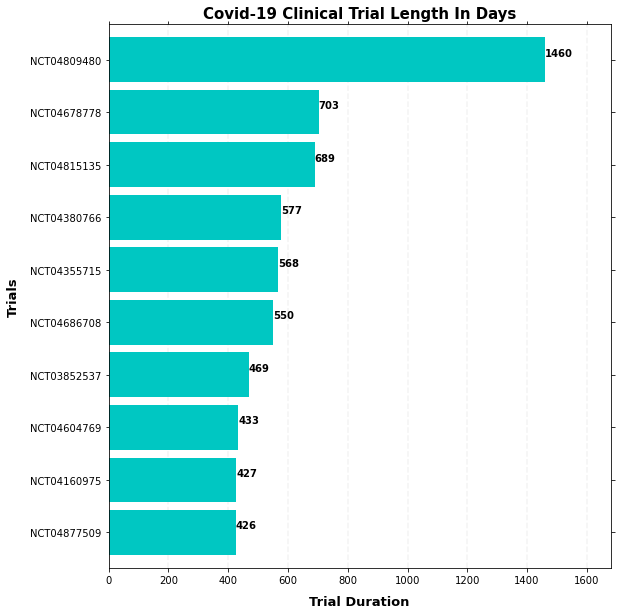

In [8]:
x = covid_df.groupby('NCT Number')['Trial Duration'].mean().sort_values().tail(10)

ax = x.plot(kind='barh', figsize=(9, 10), color='#00C7C2', zorder=2, width=0.85)


# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.7, color='#eeeeee', zorder=1)

# Set Bar Title
ax.set_title("Covid-19 Clinical Trial Length In Days", weight='bold', size=15)

# Set x-axis label
ax.set_xlabel("Trial Duration", labelpad=10, weight='bold', size=13)

# Set y-axis label
ax.set_ylabel("Trials", labelpad=10, weight='bold', size=13)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold', color ='black')
# Show Plot
plt.show()

In [9]:
print (f'The longest trial (NCT04809480) lasted 1460 days. While the shortest trial lasted only a few hours.')

The longest trial (NCT04809480) lasted 1460 days. While the shortest trial lasted only a few hours.
